## Score: 50

## Comment: 

<font color=Red>
Q1.[5+10+10] Correct
<br><br>
Q2.[10] Correct 描述趋势时，可以尝试做一个Linear Trend，这样你就能看到更明显的趋势
<br><br>
Q3.[5+5+5] Correct
<br><br>
</font>

死亡总人数排名前十的国家：
   Country  Total_Deaths
     CHINA     2139210.0
    TURKEY     1199742.0
      IRAN     1014453.0
     ITALY      498219.0
     SYRIA      419226.0
     HAITI      323484.0
AZERBAIJAN      319251.0
     JAPAN      242445.0
   ARMENIA      191890.0
  PAKISTAN      145083.0


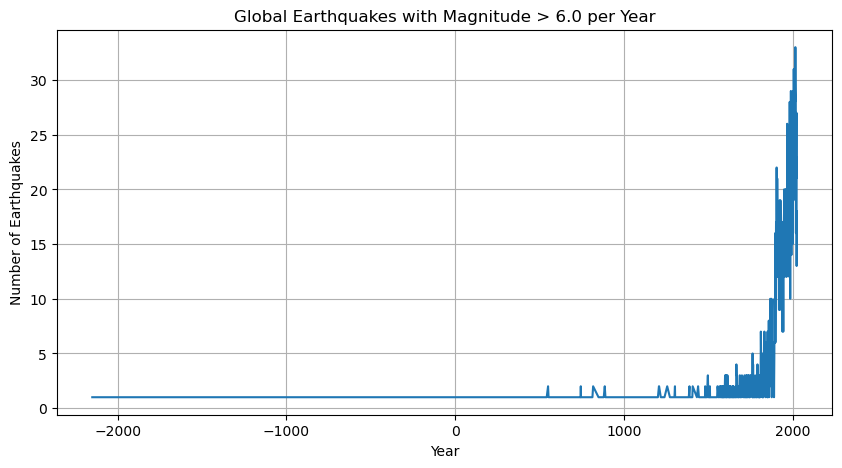

图表中呈现的 “地震次数随时间剧增” 并非地震活动的自然趋势，而是人类对地震的 “记录能力” 从无到有、从弱到强的直接反映。
古代因缺乏监测技术和记录手段，大量地震未被记载；近现代则因技术进步，地震数据被完整捕捉，从而呈现出 “地震次数剧增” 的视觉趋势。
                                     Country  Total_Quakes_Since_2150BCE  Largest_Mag  Date_of_Largest_Eq
                                       CHINA                         592          8.5          1668-07-25
                                       JAPAN                         361          9.1 2011-03-11 05:46:24
                                   INDONESIA                         340          9.1 2004-12-26 00:58:53
                                        IRAN                         263          7.9          0856-12-22
                                         USA                         229          9.2 1964-03-28 03:36:16
                                      TURKEY                         224          7.8 1939-12-26 23:57:23
                                      GREECE                         181          8.0          0365-07-21
                       

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
FILE_PATH = r"C:\Users\Future\Downloads\earthquakes.tsv"

# 读入并做清洗
df = pd.read_csv(FILE_PATH, sep="\t", low_memory=False)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Deaths"] = pd.to_numeric(df["Deaths"], errors="coerce").fillna(0)

# 自公元前2150年（-2150）以来
df = df[df["Year"] >= -2150]

#按"Country"（国家）分组，仅关注"Deaths"（死亡人数）列     dropna=False：即使国家列为缺失值（NaN），也将其归为一组（不丢弃）
grouped_by_country = df.groupby("Country", dropna=False)["Deaths"]

#对每个国家的死亡人数求和，得到"国家→总死亡人数"的Series（一维数据）
country_total_deaths = grouped_by_country.sum()

#按总死亡人数降序排序（从多到少，ascending=False表示降序）
sorted_deaths = country_total_deaths.sort_values(ascending=False)

#取排序后的前10条数据（死亡人数最多的10个国家）
top10_sorted = sorted_deaths.head(10)

#重置索引，将"Country"从"索引"转为普通列，生成DataFrame（二维表格）
top10_with_index = top10_sorted.reset_index()

#重命名列名，将"Deaths"改为"Total_Deaths"
top10 = top10_with_index.rename(columns={"Deaths": "Total_Deaths"})

#打印最终结果
print("死亡总人数排名前十的国家：")
print(top10.to_string(index=False))


#做1.2题
df["Mag"] = pd.to_numeric(df["Mag"], errors="coerce")
df = df.dropna(subset=["Year", "Mag"])    # 删除缺失年份或震级的记录

#筛选：自公元前 2150 年以来，且震级 > 6.0
df = df[df["Year"] >= -2150]
df_mag_gt6 = df[df["Mag"] > 6.0]

grouped_by_year = df_mag_gt6.groupby("Year")  #按年份分组（将震级>6.0的地震数据，按"Year"列归类
yearly_earthquake_count = grouped_by_year.size() #统计每年的地震次数
earthquake_count_df = yearly_earthquake_count.reset_index(name="Count") #转成表格和命名次数列
eq_counts = earthquake_count_df.sort_values(by="Year") #按年份升序排序

plt.figure(figsize=(10, 5))
plt.plot(eq_counts["Year"], eq_counts["Count"], linewidth=1.5)
plt.title("Global Earthquakes with Magnitude > 6.0 per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True)
plt.show()
print("图表中呈现的 “地震次数随时间剧增” 并非地震活动的自然趋势，而是人类对地震的 “记录能力” 从无到有、从弱到强的直接反映。")
print("古代因缺乏监测技术和记录手段，大量地震未被记载；近现代则因技术进步，地震数据被完整捕捉，从而呈现出 “地震次数剧增” 的视觉趋势。")

#做1.3题
for col in ["Year", "Mag", "Mo", "Dy", "Hr", "Mn", "Sec"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 1.2 国家列做清洗
df["Country"] = df["Country"].astype(str).str.strip()
df["Country"] = df["Country"].replace({"": "Unknown"}).fillna("Unknown")

#辅助：把一行记录拼成“日期字符串” 
#说明：数据里没有完整 Date 列；这里用 Year / Mo / Dy（和可选 Hr/Mn/Sec）尽量组成
#对BCE（负年份）用“YYYY BCE”表示；没有月/日就只输出有的部分
def _format_date_from_row(row):
    def _int_or_none(x):
        # 尝试转 int，失败返回 None
        try:
            if pd.isna(x):
                return None
            return int(x)
        except Exception:
            return None

    y = _int_or_none(row.get("Year"))
    m = _int_or_none(row.get("Mo"))
    d = _int_or_none(row.get("Dy"))
    hr = _int_or_none(row.get("Hr"))
    mn = _int_or_none(row.get("Mn"))
    sc = _int_or_none(row.get("Sec"))

    if y is None:
        return ""

    # 年份字符串：BCE 用 “YYYY BCE”，CE 用四位年
    if y < 0:
        y_str = f"{abs(y)} BCE"
    else:
        y_str = f"{y:04d}"

    # 逐步拼接（有就拼，没有就省略）
    if m is None and d is None:
        date_str = y_str
    elif m is not None and d is None:
        date_str = f"{y_str}-{m:02d}"
    else:
        # m 与 d 同时存在才到天
        if m is not None and d is not None:
            date_str = f"{y_str}-{m:02d}-{d:02d}"
        else:
            date_str = y_str  # 不足则退回只显示年份

    # 如果有时间，再拼时间
    time_parts = []
    if hr is not None:
        time_parts.append(f"{hr:02d}")
        if mn is not None:
            time_parts.append(f"{mn:02d}")
            if sc is not None:
                time_parts.append(f"{sc:02d}")
    if time_parts:
        # 只有小时 -> "HH", 有分 -> "HH:MM", 有秒 -> "HH:MM:SS"
        if len(time_parts) == 1:
            date_str = f"{date_str} {time_parts[0]}"
        elif len(time_parts) == 2:
            date_str = f"{date_str} {time_parts[0]}:{time_parts[1]}"
        else:
            date_str = f"{date_str} {time_parts[0]}:{time_parts[1]}:{time_parts[2]}"

    return date_str

def CountEq_LargestEq(country_name: str):
    #统一匹配（忽略大小写与前后空格）
    key = str(country_name).strip().lower()

    #该国“自公元前2150年以来”的记录（用于统计总数）
    df_since_2150 = df[(df["Year"].notna()) & (df["Year"] >= -2150)]
    sub_since = df_since_2150[df_since_2150["Country"].str.lower() == key]
    total_count = len(sub_since)

    #该国“全时期”的记录（用于找最大震级及其日期）
    sub_all = df[df["Country"].str.lower() == key]

    if len(sub_all) == 0:
        # 该国完全不存在于数据中
        return 0, "", np.nan

    #如果Mag全是缺失，日期返回空
    if "Mag" not in sub_all or sub_all["Mag"].notna().sum() == 0:
        return total_count, "", np.nan

    #找到最大震级的那一行（若有并列，idxmax 会取第一条）
    idx_max = sub_all["Mag"].idxmax()
    largest_mag = sub_all.at[idx_max, "Mag"]

    #用Year/Mo/Dy/Hr/Mn/Sec尽量拼一个可读日期
    date_of_largest = _format_date_from_row(sub_all.loc[idx_max])

    return total_count, date_of_largest, largest_mag

#取国家列表（去空/去重）
countries = (
    df["Country"].astype(str).str.strip().replace("", np.nan).dropna().unique()
)

#逐国计算
rows = []
for c in countries:
    total_cnt, largest_date, largest_mag = CountEq_LargestEq(c)
    rows.append({
        "Country": c,
        "Total_Quakes_Since_2150BCE": total_cnt,
        "Largest_Mag": largest_mag,
        "Date_of_Largest_Eq": largest_date
    })

#汇总为 DataFrame，并按“地震总数”降序（并列时按最大震级降序）
res_df = pd.DataFrame(rows).sort_values(
    by=["Total_Quakes_Since_2150BCE", "Largest_Mag"],
    ascending=[False, False]
).reset_index(drop=True)

print(res_df.to_string(index=False))

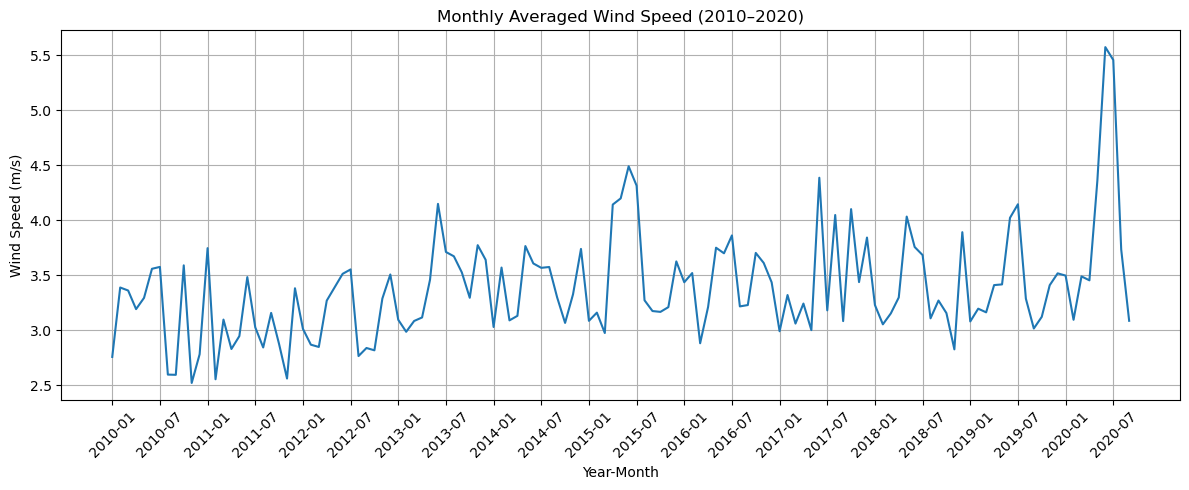

从 2010 到 2020 年的月平均风速并无明显趋势，整体呈现逐年波动状态，虽在2015、2017、2020 年出现峰值，但未形成持续的上升或下降走势。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Future\Downloads\2281305.csv"

#读取 CSV
df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)

# 拆分 WND: 方向, 方向QC, 类型, 风速(0.1 m/s), 风速QC
parts = df["WND"].astype(str).str.split(",", expand=True)
speed_raw = pd.to_numeric(parts[3], errors="coerce")
speed_qc  = pd.to_numeric(parts[4], errors="coerce")

#过滤（按用户指南POS 66–70）
#合法风速：0–900 (代表 0.0–90.0 m/s)
#质量码：保留 0/1/4/5
mask = speed_raw.between(0, 900) & speed_qc.isin([0, 1, 4, 5])
df = df[mask].copy()

#换算单位：m/s
df["wind_mps"] = speed_raw[mask] / 10.0

# 时间处理与筛选：2010–2020
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df = df[(df["DATE"].dt.year >= 2010) & (df["DATE"].dt.year <= 2020)]

#月均风速
monthly = (
    df.groupby(df["DATE"].dt.to_period("M"))["wind_mps"]
      .mean()
      .reset_index()
      .rename(columns={"DATE": "YearMonth"})
)
monthly["YearMonth"] = monthly["YearMonth"].astype(str)

#画图
plt.figure(figsize=(12, 5))
plt.plot(monthly["YearMonth"], monthly["wind_mps"], lw=1.5)
plt.title("Monthly Averaged Wind Speed (2010–2020)")
plt.xlabel("Year-Month")
plt.ylabel("Wind Speed (m/s)")
step = 6
plt.xticks(range(0, len(monthly), step), monthly["YearMonth"].iloc[::step], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("从 2010 到 2020 年的月平均风速并无明显趋势，整体呈现逐年波动状态，虽在2015、2017、2020 年出现峰值，但未形成持续的上升或下降走势。")

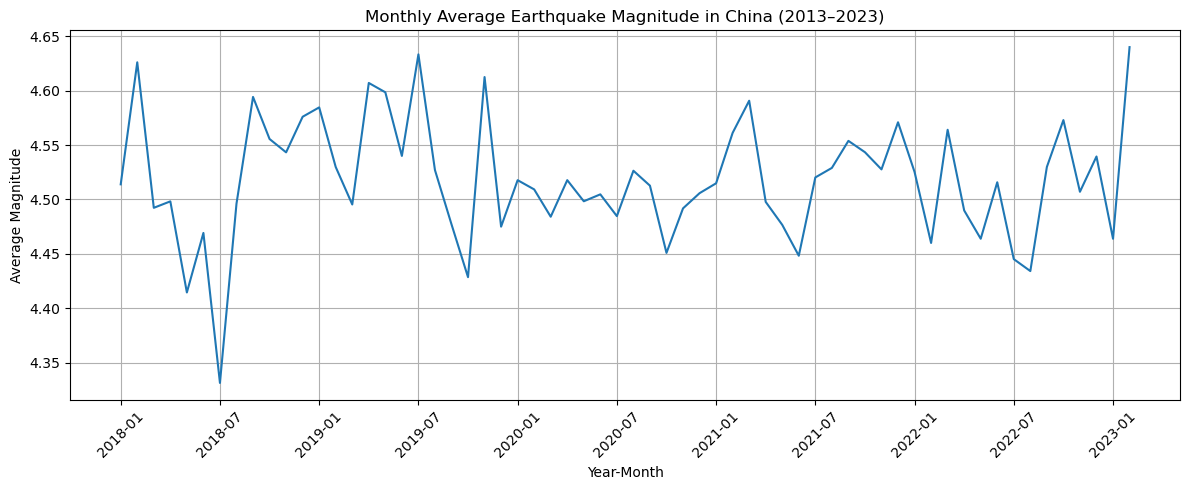

数据统计结果：
数据时间范围: 2018-01-01 19:22:03.580000 至 2023-02-04 07:34:41.538000
记录总数: 4828
平均震级: 4.52
最大震级: 7.3
最小震级: 2.6
平均震源深度: 29.92 km
最深震源深度: 584.069 km

震级区间统计：
mag_category
<3        3
3–4     252
4–5    4189
5–6     358
6–7      25
≥7        1


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#数据加载与清洗  2013-2023 年中国境内地震位置、震级及深度数据集
file_path = r"C:\Users\Future\Downloads\query.csv"
df = pd.read_csv(file_path, encoding="gb18030")

# 删除缺失值与异常值
df = df.dropna(subset=["time", "mag", "depth"])
df = df[(df["mag"] > 0) & (df["depth"] >= 0)]

# 转换时间列
df["time"] = pd.to_datetime(df["time"], errors="coerce").dt.tz_localize(None)
df["YearMonth"] = df["time"].dt.to_period("M")

# 绘制震级时间序列   按月取平均震级
df["YearMonth"] = df["time"].dt.to_period("M")
monthly_mag = df.groupby("YearMonth")["mag"].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_mag["YearMonth"].astype(str), monthly_mag["mag"], lw=1.5)
plt.title("Monthly Average Earthquake Magnitude in China (2013–2023)")
plt.xlabel("Year-Month")
plt.ylabel("Average Magnitude")
plt.xticks(range(0, len(monthly_mag), 6), monthly_mag["YearMonth"].iloc[::6], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#统计分析
print("数据统计结果：")
print(f"数据时间范围: {df['time'].min()} 至 {df['time'].max()}")
print(f"记录总数: {len(df)}")
print(f"平均震级: {df['mag'].mean():.2f}")
print(f"最大震级: {df['mag'].max()}")
print(f"最小震级: {df['mag'].min()}")
print(f"平均震源深度: {df['depth'].mean():.2f} km")
print(f"最深震源深度: {df['depth'].max():.3f} km")


bins = [0, 3, 4, 5, 6, 7, 10]
labels = ["<3", "3–4", "4–5", "5–6", "6–7", "≥7"]
df["mag_category"] = pd.cut(df["mag"], bins=bins, labels=labels, include_lowest=True)

print("\n震级区间统计：")
print(df["mag_category"].value_counts().sort_index().to_string(index=True))

